# Compare transient forcing estimates to fixed-SST forcing

In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [7]:
directory = '../Estimates/piClim-histall_forcing/'
file_list = [ f.name for f in os.scandir(directory) if f.name !='.ipynb_checkpoints']
model_list = [file.rsplit('_')[0] for file in file_list]
models = np.unique(model_list).tolist()
file_list

['CanESM5_r3i1p2f1_transientERF.csv',
 'GFDL-CM4_r3i1p1f1_transientERF.csv',
 'MIROC6_r3i1p1f1_transientERF.csv',
 'CNRM-CM6-1_r1i1p1f2_transientERF.csv',
 'GISS-E2-1-G_r1i1p1f2_transientERF.csv',
 'GFDL-CM4_r1i1p1f1_transientERF.csv',
 'MIROC6_r2i1p1f1_transientERF.csv',
 'CanESM5_r1i1p2f1_transientERF.csv',
 'GFDL-CM4_r2i1p1f1_transientERF.csv',
 'MIROC6_r1i1p1f1_transientERF.csv',
 'CanESM5_r2i1p2f1_transientERF.csv',
 'IPSL-CM6A-LR_r3i1p1f1_transientERF.csv',
 'NorESM2-LM_r2i1p2f1_transientERF.csv',
 'HadGEM3-GC31-LL_r2i1p1f3_transientERF.csv',
 'NorESM2-LM_r1i1p1f1_transientERF.csv',
 'NorESM2-LM_r1i1p2f1_transientERF.csv',
 'NorESM2-LM_r2i1p1f1_transientERF.csv',
 'HadGEM3-GC31-LL_r1i1p1f3_transientERF.csv',
 'NorESM2-LM_r3i1p1f1_transientERF.csv',
 'IPSL-CM6A-LR_r1i1p1f1_transientERF.csv',
 'HadGEM3-GC31-LL_r3i1p1f3_transientERF.csv',
 'GISS-E2-1-G_r1i1p1f1_transientERF.csv',
 'GISS-E2-1-G_r1i1p3f2_transientERF.csv',
 'MPI-ESM1-2-LR_Angshuman_transientERF.csv',
 'NorESM2-LM_r3i1

In [8]:
models

['CNRM-CM6-1',
 'CanESM5',
 'EC-Earth3',
 'GFDL-CM4',
 'GISS-E2-1-G',
 'HadGEM3-GC31-LL',
 'IPSL-CM6A-LR',
 'MIROC6',
 'MPI-ESM1-2-LR',
 'NorESM2-LM']

CNRM-CM6-1
CanESM5
EC-Earth3
GFDL-CM4
GISS-E2-1-G
HadGEM3-GC31-LL
IPSL-CM6A-LR
MIROC6
MPI-ESM1-2-LR
NorESM2-LM


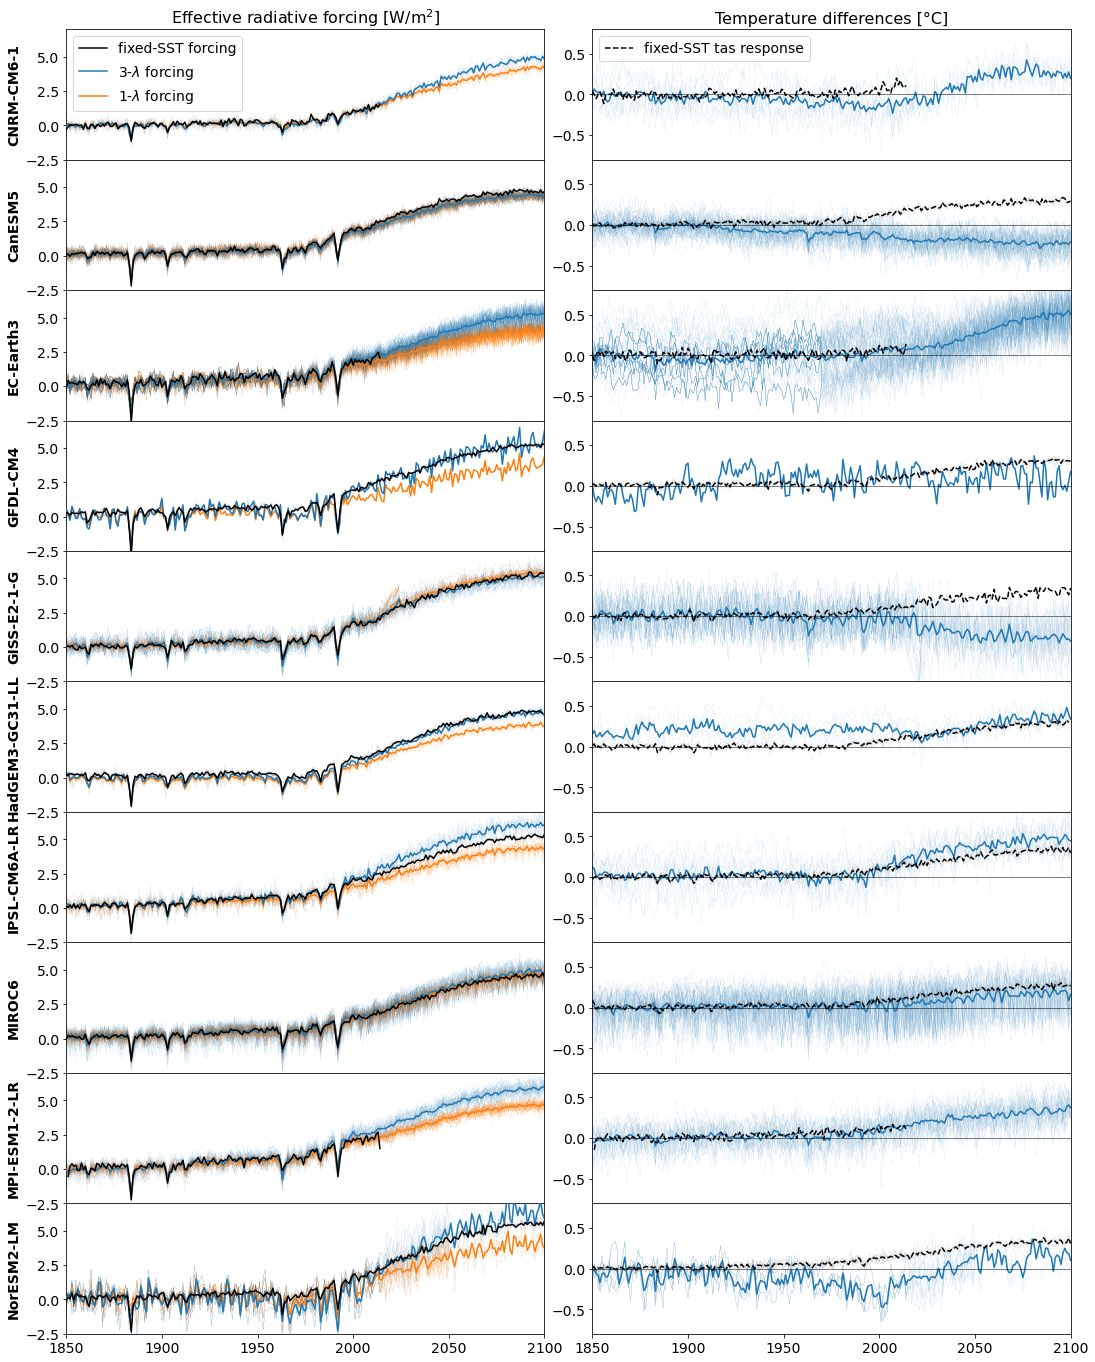

In [11]:
npanels = len(models)
# make figure
fig = plt.figure(figsize = [18,24]);
plt.subplots_adjust(hspace=0.0, wspace = 0.1)
outer = gridspec.GridSpec(npanels, 1) 

member_width = 0.1
member_mean_width = 1.5

palette = sns.color_palette(None, 2)
c3 = palette[0]; # 3-lambda
c1 = palette[1]; # 1-lambda

for (k, model) in enumerate(models):
#for (k,model) in enumerate([models[4]]):
    print(model)
    # for each row in outer gridspec, plot results for model:
    gs_k = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[k], hspace = 0.1)
    f_plot = fig.add_subplot(gs_k[0])
    t_plot = fig.add_subplot(gs_k[1])
    
    f_plot.set_xlim(1850,2100); f_plot.set_ylim(-2.5,7.0)
    t_plot.set_xlim(1850,2100); t_plot.set_ylim(-0.8,0.8)
    f_plot.tick_params(axis='both',labelsize=14); t_plot.tick_params(axis='both',labelsize=14)  
    #f_plot.text(0.05, 0.8, model, fontsize=14, transform=f_plot.transAxes)
    f_plot.set_ylabel(model, fontsize=14, fontweight = 'bold')
    t_plot.axhline(0, color='k', linewidth = 0.5) # horizontal lines
    
    if k == 0:
        f_plot.set_title('Effective radiative forcing [W/m$^2$]', fontsize = 16)
        t_plot.set_title('Temperature differences [°C]', fontsize = 16)
    if k < npanels - 1:
        f_plot.axes.xaxis.set_visible(False)
        t_plot.axes.xaxis.set_visible(False)

    
    # load fixed-SST forcing and plot it:
    files_to_use = [file for file in file_list if file.rsplit('_')[0] == model]
    if 'GISS-E2-1-G_r1i1p3f2_transientERF.csv' in files_to_use:
        files_to_use.remove('GISS-E2-1-G_r1i1p3f2_transientERF.csv')
    df_allmembers = pd.DataFrame(index = np.arange(1850, 2100+1))
    for (fi, file) in enumerate(files_to_use):
        data = pd.read_csv(directory + file, index_col=0)
        member = file.rsplit('_')[1]
        df_allmembers[member] = data
        f_plot.plot(data['ERF'], color = 'black', linewidth = member_width, zorder=5)
        
    f_plot.plot(df_allmembers.mean(axis=1), color = 'black', linewidth = member_mean_width, label = 'fixed-SST forcing', zorder=5)

            
    # load my 3-lambda forcing estimates and plot them:
    filedir = '../Estimates/Transient_forcing_estimates/' + model + '/ssp245/'
    filesindir = [f.name for f in os.scandir(filedir) if f.name !='.ipynb_checkpoints']
    files_to_use_ERF = [file for file in filesindir if file.rsplit('_')[1][-6:] == 'ssp245' and file.rsplit('_')[3] == 'ERF.csv']
    df_allmembers = pd.DataFrame(index = np.arange(1850, 2100+1))
    for (fi, file) in enumerate(files_to_use_ERF):
        data = pd.read_csv(filedir + file, index_col=0)
        member = file.rsplit('_')[2]
        df_allmembers[member] = data
        f_plot.plot(data['ERF'], color = c3, linewidth = member_width, alpha=0.5, zorder=2)
    f_plot.plot(df_allmembers.mean(axis=1), color = c3, linewidth = member_mean_width, label = '3-$\lambda$ forcing', zorder=4)
    
    # load my 1-lambda forcing estimates and plot them:
    filedir = '../Estimates/Transient_forcing_estimates/' + model + '/ssp245/'
    filesindir = [f.name for f in os.scandir(filedir) if f.name !='.ipynb_checkpoints']
    files_to_use_F13_ERF = [file for file in filesindir if file.rsplit('_')[1][-6:] == 'ssp245' and file.rsplit('_')[3] == 'F13']
    df_allmembers = pd.DataFrame(index = np.arange(1850, 2100+1))
    for (fi, file) in enumerate(files_to_use_F13_ERF):
        data = pd.read_csv(filedir + file, index_col=0)
        member = file.rsplit('_')[2]
        df_allmembers[member] = data
        f_plot.plot(data['ERF'], color = c1, linewidth = member_width, zorder=1)
    f_plot.plot(df_allmembers.mean(axis=1), color = c1, linewidth = member_mean_width, label = '1-$\lambda$ forcing', zorder=3)
    
    if k == 0:
        f_plot.legend(fontsize=14, loc = 'upper left')   
        
    # plot temperature response in fixed-SST run
    directory_tas = '../Estimates/piClim-histall_tasresponse/'
    file_list_tas = [ f.name for f in os.scandir(directory_tas) if f.name !='.ipynb_checkpoints']
    files_to_use_tas = [file for file in file_list_tas if file.rsplit('_')[0] == model]
    if 'GISS-E2-1-G_r1i1p3f2_tas_response.csv' in files_to_use_tas:
        files_to_use_tas.remove('GISS-E2-1-G_r1i1p3f2_tas_response.csv')
    df_allmembers = pd.DataFrame(index = np.arange(1850, 2100+1))
    for (fi, file) in enumerate(files_to_use_tas):
        data = pd.read_csv(directory_tas + file, index_col=0)
        member = file.rsplit('_')[1]
        df_allmembers[member] = data
        t_plot.plot(data['tas'], '--', color = 'black', linewidth = member_width, zorder=2)
    t_plot.plot(df_allmembers.mean(axis=1), '--', color = 'black', linewidth = member_mean_width, label= 'fixed-SST tas response', zorder=2)
    if k == 0:
        t_plot.legend(fontsize=14, loc = 'upper left')
        
    # plot temperature deviation between linear model and coupled model
    files_to_use_tas = [file for file in filesindir if file.rsplit('_')[1][-6:] == 'ssp245' and file.rsplit('_')[3] == 'tas']
    df_allmembers = pd.DataFrame(index = np.arange(1850, 2100+1))
    for file in files_to_use_tas:
        data = pd.read_csv(filedir + file, index_col=0)
        member = file.rsplit('_')[2]
        df_allmembers[member] = data
        #t_plot.plot(data, color = c3, linewidth = member_width, zorder=1) 
        t_plot.plot(data['tas_diff'], color = c3, linewidth = member_width, alpha=0.5, zorder=1)    
    t_plot.plot(df_allmembers.mean(axis=1), color = c3, linewidth = member_mean_width, zorder=1)   

#fig.set_rasterized(True)
#plt.savefig('../Figures/transient_forcing_comparisons.pdf', format='pdf', dpi=600, rasterized=True, bbox_inches="tight")

plt.savefig('../Figures/transient_forcing_comparisons10.pdf', format='pdf', dpi=1200, bbox_inches="tight")
    

In [77]:
data['tas_diff']

Year
1850    0.033253
1851   -0.027170
1852   -0.132722
1853    0.148203
1854    0.066160
          ...   
2096    0.625500
2097    0.447421
2098    0.588504
2099    0.470254
2100    0.250302
Name: tas_diff, Length: 251, dtype: float64

In [73]:
df_allmembers.columns

Index(['r110i1p1f1', 'r143i1p1f1', 'r120i1p1f1', 'r4i1p1f1', 'r130i1p1f1',
       'r16i1p1f1', 'r9i1p1f1', 'r18i1p1f1', 'r15i1p1f1', 'r133i1p1f1',
       'r7i1p1f1', 'r150i1p1f1', 'r140i1p1f1', 'r123i1p1f1', 'r113i1p1f1',
       'r25i1p1f1', 'r103i1p1f1', 'r115i1p1f1', 'r118i1p1f1', 'r108i1p1f1',
       'r23i1p1f1', 'r105i1p1f1', 'r138i1p1f1', 'r1i1p1f1', 'r13i1p1f1',
       'r135i1p1f1', 'r125i1p1f1', 'r146i1p1f1', 'r128i1p1f1', 'r148i1p1f1',
       'r126i1p1f1', 'r145i1p1f1', 'r136i1p1f1', 'r10i1p1f1', 'r2i1p1f1',
       'r106i1p1f1', 'r116i1p1f1', 'r137i1p1f1', 'r11i1p1f1', 'r149i1p1f1',
       'r144i1p1f1', 'r127i1p1f1', 'r117i1p1f1', 'r107i1p1f1', 'r21i1p1f1',
       'r109i1p1f1', 'r22i1p1f1', 'r104i1p1f1', 'r114i1p1f1', 'r119i1p1f1',
       'r147i1p1f1', 'r124i1p1f1', 'r129i1p1f1', 'r139i1p1f1', 'r12i1p1f1',
       'r134i1p1f1', 'r122i1p1f1', 'r141i1p1f1', 'r19i1p1f1', 'r6i1p1f1',
       'r14i1p1f1', 'r132i1p1f1', 'r24i1p1f1', 'r102i1p1f1', 'r112i1p1f1',
       'r111i1p1f1', 'r10

In [76]:
df_allmembers.mean(axis=1)

1850    0.036377
1851   -0.008910
1852   -0.087607
1853    0.007028
1854    0.084394
          ...   
2096    0.479064
2097    0.506045
2098    0.527251
2099    0.554480
2100    0.502144
Length: 251, dtype: float64